# **0. Kaggle 데이터 연결**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bonecar","key":"16e8cf29f7ed598055d79be78b65be57"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
100% 219M/219M [00:02<00:00, 113MB/s] 
100% 219M/219M [00:02<00:00, 99.6MB/s]


In [ ]:
!unzip -o /content/rice-image-dataset.zip -d /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/data/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: /conte

# **1. Introduction**

## 1.1 Rice Variety Classification and Quality Evaluation Using Image Analysis

Rice, as one of the most prevalent grain crops globally, exhibits significant genetic diversity, resulting in various rice varieties. Theses varietues exhibit variations in essential characteristics such as **texture**, **shape**, and **color**. By harnessing these differentiating features, it becomes possible to accurately classify and assess the quality of rice seeds.

This research initiative aims to **develop a robust image analysis system** capable of automatically identifying and categorizing diferent rice varieties based on their visual attributes. By employing advanced **machine learning techniques** and **deep neural networks**, the project endeavors to create a model that can accurately classify rice samples into the five target varieties.

Additionally, the developed **image analysis model** can contribute to the broader field of **computer vision** and **pattern recognition**. The insight gained from this research can be applied to other **grain crops** and **agricultural products**, leading to advancements in **automated classification** and quality evaluation across various agricultural domains.

In Summary, the **Rice Variety Classification and Quality Evaluation project** utilizes a comprehensive dateset of 75,000 rice images ti develop a state-of-the-art image analysis system. By accurately classifying and evaluation the quality attributes of five distinct rice varieties, this research aims to enhance rice production processes, support seed selection, and drive advancements in computer vision for agricultural applications. For more information about the dateset use the following Kaggle link:
 https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

# **2. Import Libraries**

In [ ]:
# import requirement libraries and tools
import os
# from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import warnings
warnings.filterwarnings('ignore')

# **3. Create a dataframe with the Images and Labels**

In [ ]:
# set the path to the dataset
dataset_path = '/content/data/Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# loop over the subfolders in the datset
### subsolder내 하위 폴더를 불러오면서 각 하위 폴더 내 이미지의 파일 주소를 image 리스트에 저장하고, 하위 폴더의 이름들을 label 리스트에 저장하는 loop문

for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path): ### 하위 폴더가 없을 경우, loop문 넘어감.
        continue

    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

# Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

# **4. Visualization of Dataset**

In [ ]:
df.head()

,image,label
0,/content/data/Rice_Image_Dataset/Jasmine/Jasmi...,Jasmine
1,/content/data/Rice_Image_Dataset/Jasmine/Jasmi...,Jasmine
2,/content/data/Rice_Image_Dataset/Jasmine/Jasmi...,Jasmine
3,/content/data/Rice_Image_Dataset/Jasmine/Jasmi...,Jasmine
4,/content/data/Rice_Image_Dataset/Jasmine/Jasmi...,Jasmine


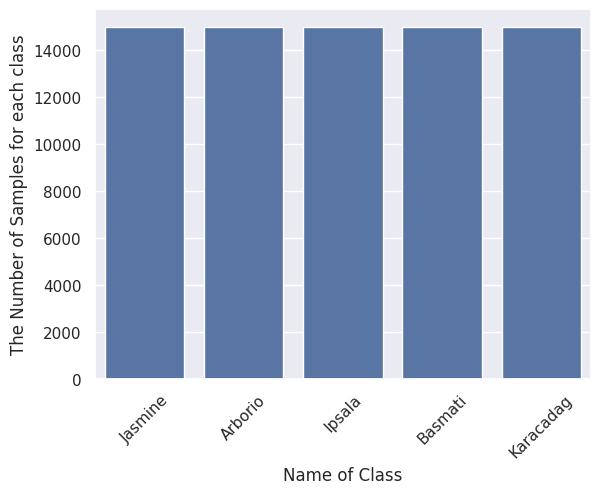

In [ ]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel('Name of Class')
ax.set_ylabel('The Number of Samples for each class')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

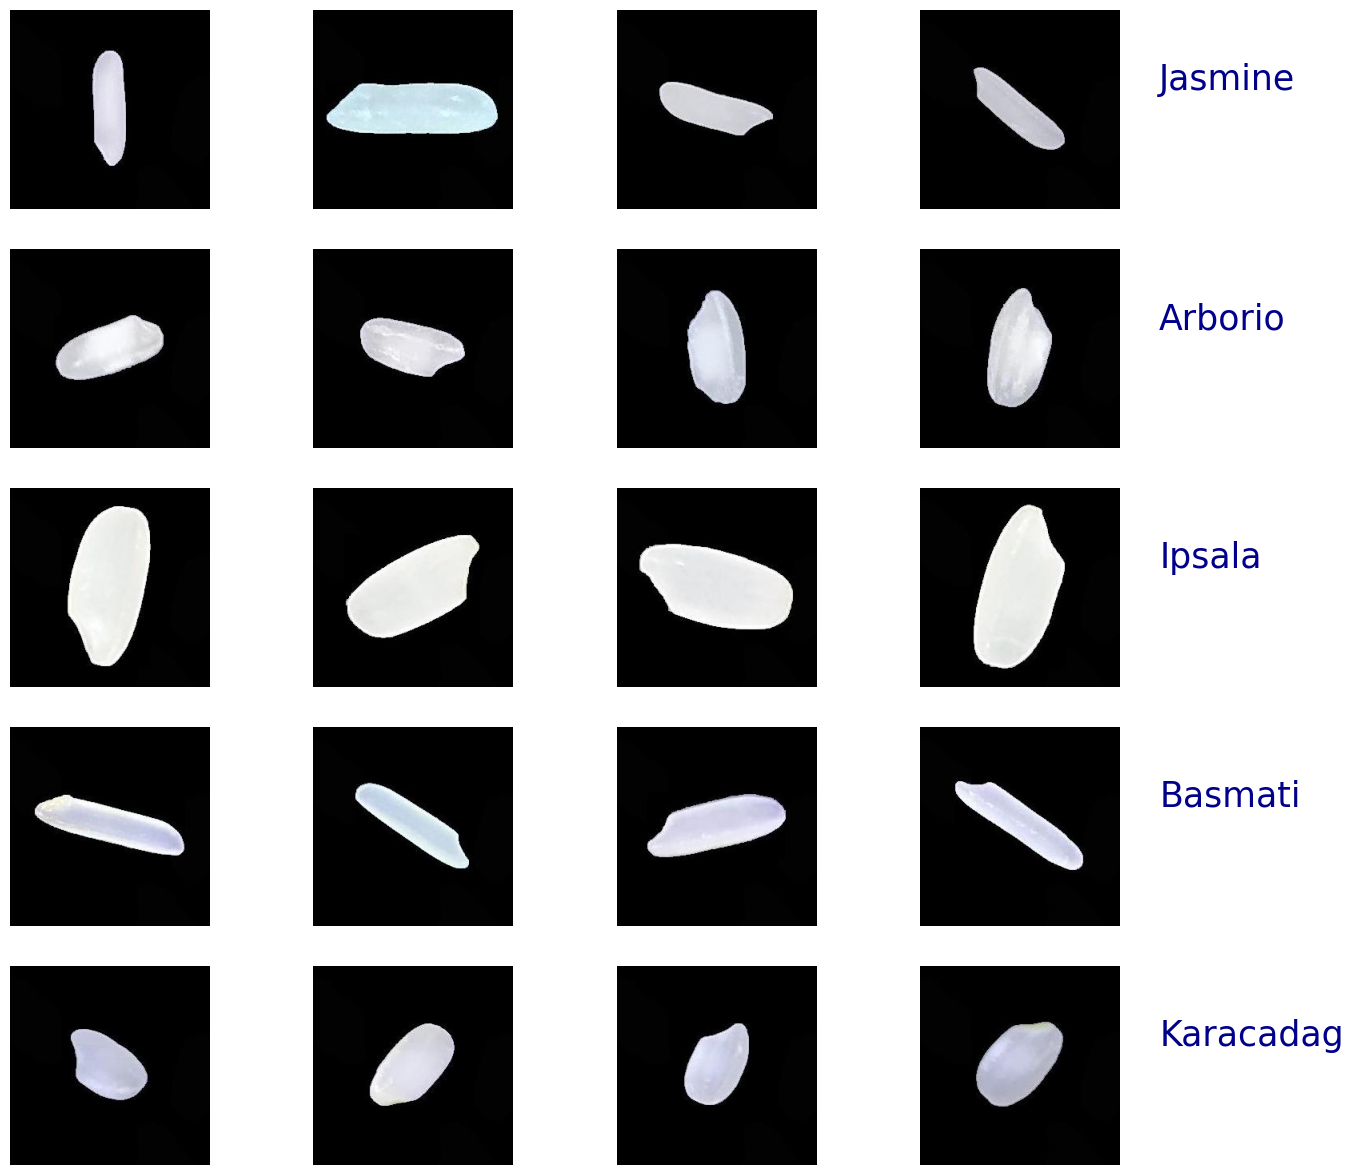

In [ ]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15,15))
gs = GridSpec(5,4, figure = fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label']==category]['image'].values[:4]

    # Loop through the filepaths and add an iamge to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i,j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300,100, category, fontsize = 25, color = 'darkblue')
    ### 서브플롯에서 (300, 100) 좌표에 텍스트를 추가하는 방법

plt.show()

# **5.Split Data into Train and Test**

I divided our data into two separate datasets: the training dataset and the testing dataset. The training dataset consists of 80% of the data while the testing dataset contains the remaing 20%. To facilitate the training process, I applied the LabelEncoder to labels. This process allowed us to convert the rice types' labels, namely 'Arborio', 'Basmati', 'Ipsala', 'Jasmine', and 'Karacadag', into numerical values. By assigning interger values to the labels, we enabled the utilization of these labels as target variables during the training of our machine learning model.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size = 0.2, random_state = 42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# **6.Data Augmentation**

To streamline the preprocessing of our images, we took the following steps:

* we created generators for both the training and testing datasets. These generators allow us to efficiently handel and manipulated the data during the training and testing phases.

* to enhance the diversity and robustness of our training data, we applied data augmentation techniques specifically to the training dataset. This augmentation process introduces variations in the images by applying transformations such as rotation, scaling, and flipping. By doing so, we expand the dataset and enable our model to learn from a wider range of image variations.

* Additionally, we standardized the image dimensions by reshaping them to a uniform size of 50x50 pixels. This resizing ensures that all images in the dataset have consistent dimensions, facilitating the subsequent processing and analysis stages.

In [ ]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50,50)
batch_size = 32

# Create and ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,         # 정규화
    rotation_range=45,      # 이미지를 45도까지 회전까지 회전
    width_shift_range=0.2,  # 수평 방향으로 20%까지 이동
    height_shift_range=0.2, # 수직 방향으로 20%까지 이동
    shear_range=0.2,        # 0.2 라디안까지 기울이는 변환
    zoom_range=0.2,         # 20%까지 확대 또는 축소
    horizontal_flip=True,   # 이미지 수평 반전
    fill_mode='nearest'     # 이미지 변환시 빈공간이 생기면 채우기
)

# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',   # 다중클래스 분류 -> one-hot encoding으로 변환
    shuffle=True                # 데이터를 섞음 -> 학습시 순서가 모델에 영향을 주지 않도록
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False               # 테스트 데이터로 학습하지 않기 때문에 False로 설정
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


# **7. Training Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50,50,3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [ ]:
# Train the model on the training data
history = model.fit(train_generator, epochs = 5, validation_data = test_generator)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 68ms/step - accuracy: 0.7728 - loss: 0.5546 - val_accuracy: 0.9229 - val_loss: 0.2048
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 73ms/step - accuracy: 0.9385 - loss: 0.1679 - val_accuracy: 0.9693 - val_loss: 0.0881
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - accuracy: 0.9582 - loss: 0.1151 - val_accuracy: 0.9768 - val_loss: 0.0664
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 64ms/step - accuracy: 0.9695 - loss: 0.0848 - val_accuracy: 0.9691 - val_loss: 0.0878
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9703 - loss: 0.0832 - val_accuracy: 0.9669 - val_loss: 0.0948


# **8. Evaluate the Model**

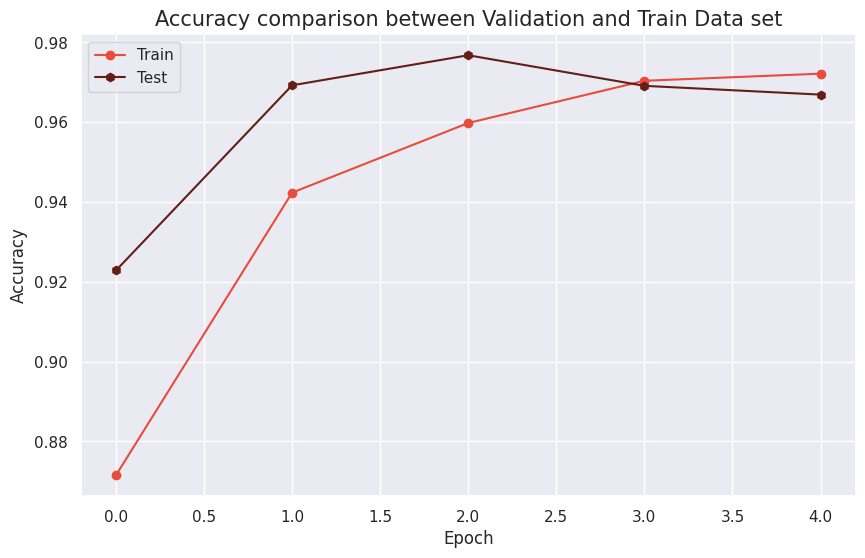

In [ ]:
# Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], color = '#E74C3C', marker='o')
plt.plot(history.history['val_accuracy'], color = '#641E16', marker ='h')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'best')
plt.show()

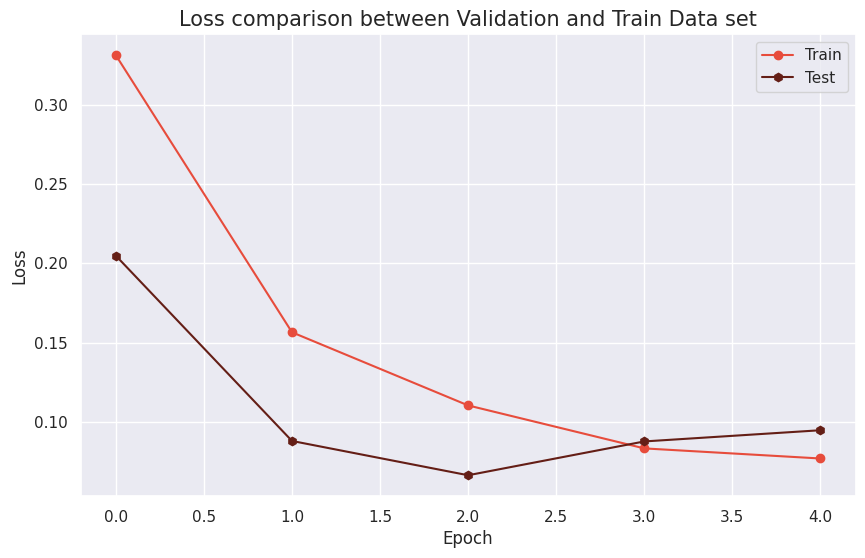

In [ ]:
# Loss comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color = '#E74C3C', marker='o')
plt.plot(history.history['val_loss'], color = '#641E16', marker ='h')
plt.title('Loss comparison between Validation and Train Data set', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'best')
plt.show()

In [ ]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9635 - loss: 0.0999
Accuracy: 0.9643999934196472


# **9. Save the Model**

In [ ]:
model.save('CNN_model.h5')
print('Model saved sucessfully!')

Model saved sucessfully!
